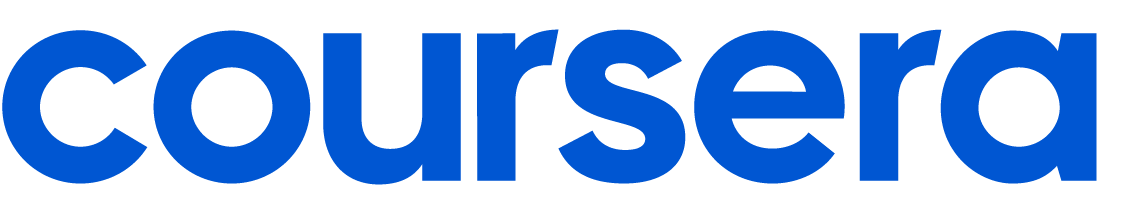

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [ ]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [ ]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import any other packages you may want to use
from collections import Counter
!pip install xgboost
!pip install lightgbm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [ ]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

In [ ]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [ ]:
# Check Nulls
null_counts = train_df.isnull().sum()
print(null_counts)

In [ ]:
# Check class imbalance
print(train_df["Churn"].value_counts())

# Check class distribution in percentage
print(train_df["Churn"].value_counts(normalize=True) * 100)

In [ ]:
sns.countplot(x="Churn", data=train_df)
plt.title("Churn Distribution")
plt.show()

In [ ]:
unique_values = {col: train_df[col].unique() for col in train_df.columns}
for col, values in unique_values.items():
    print(f"Column '{col}': {values}")

In [ ]:
print(train_df.info())
print(train_df.describe())

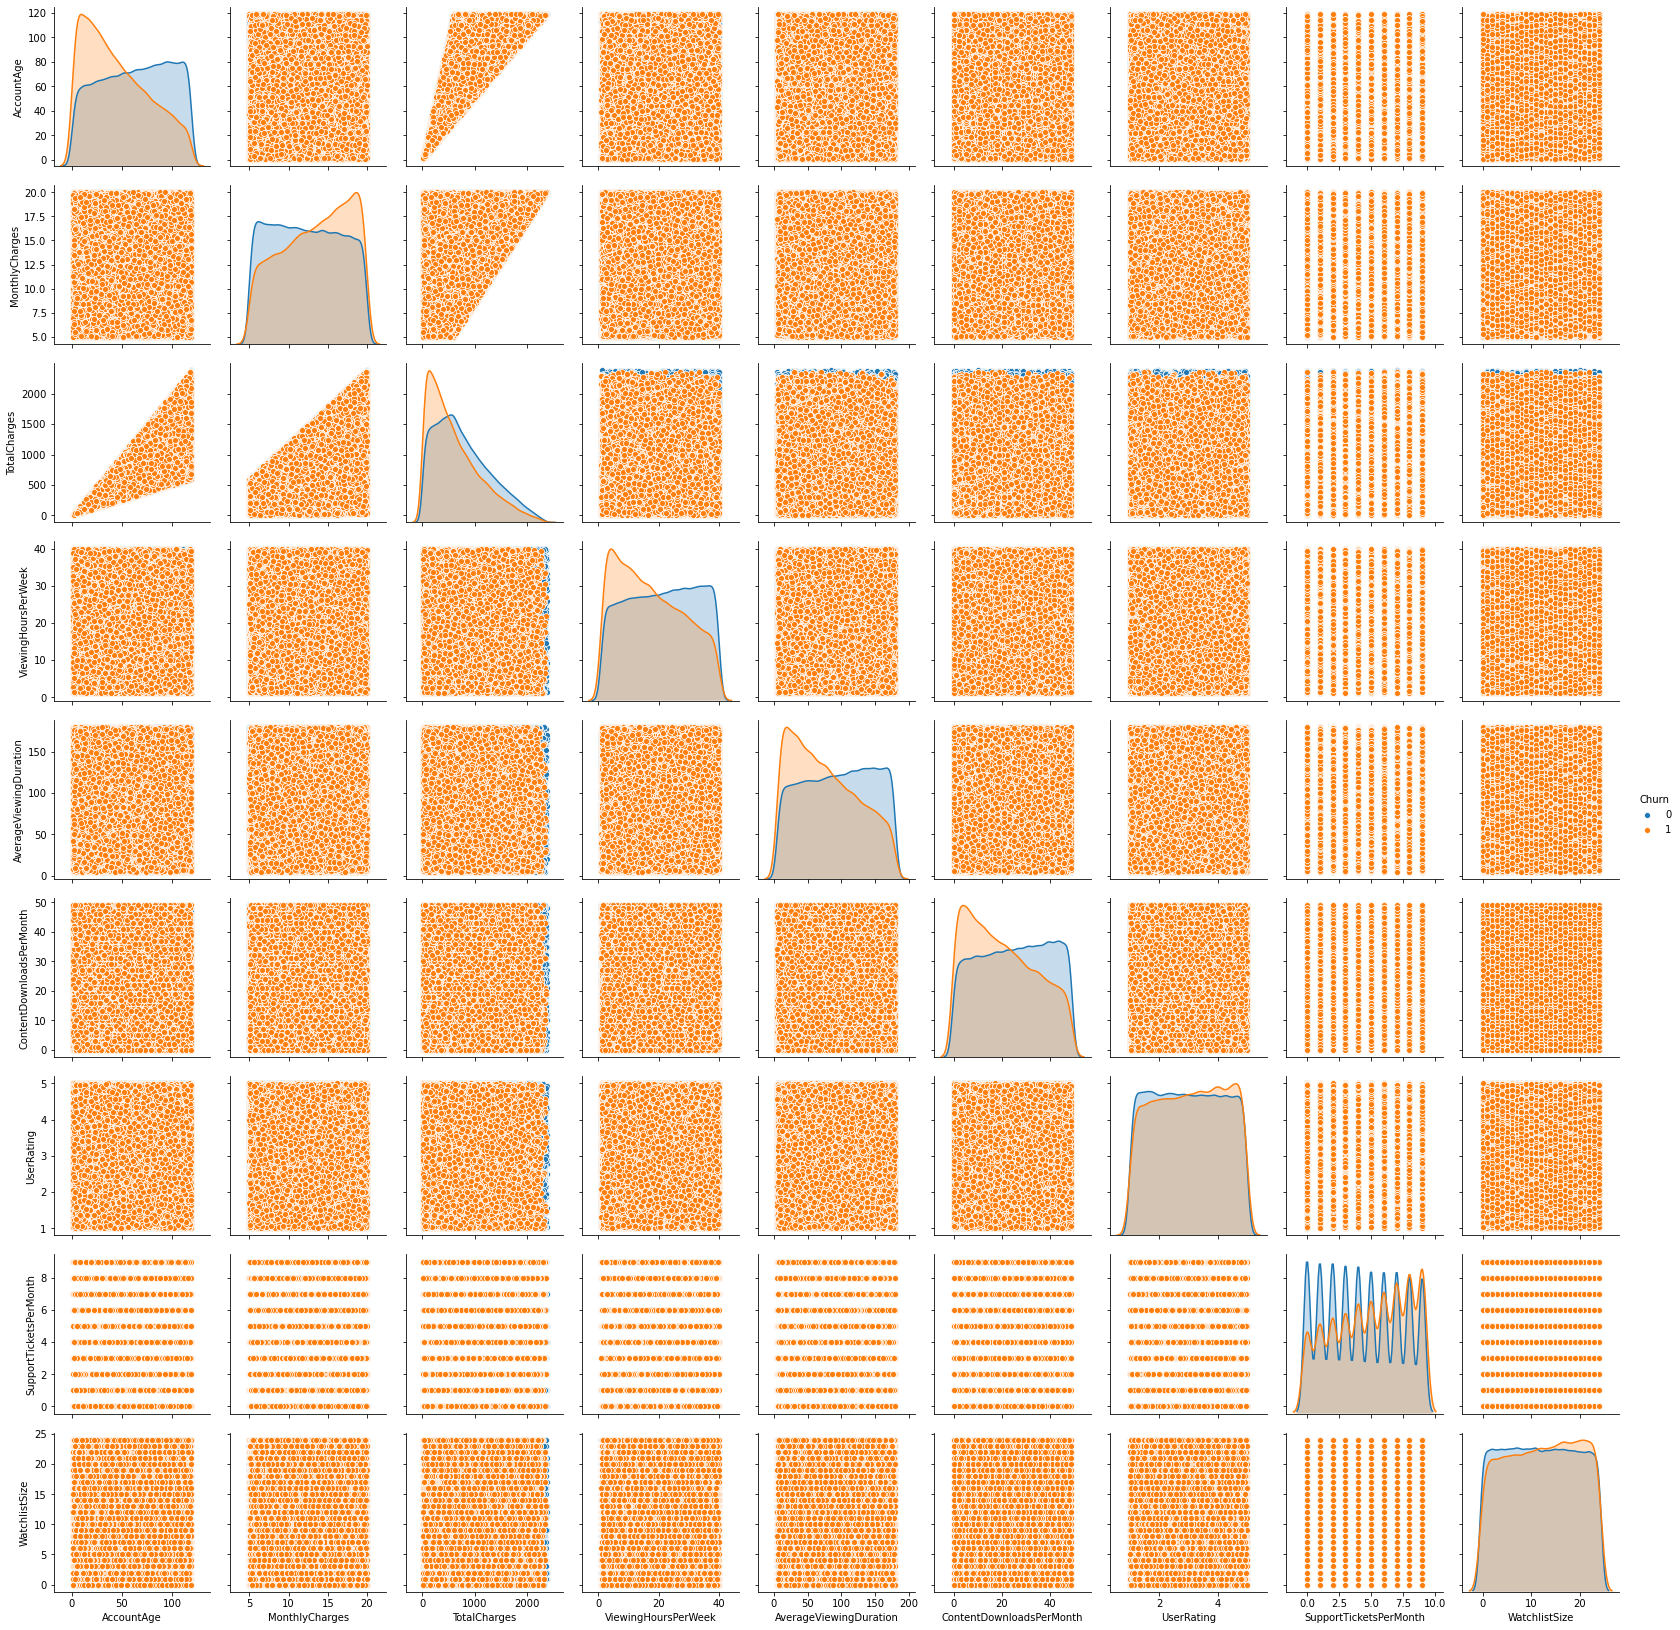

In [16]:
# Plot pairwise correlation graphs
new_df = train_df.drop(columns=["SubscriptionType", "PaymentMethod", "PaperlessBilling","ContentType","MultiDeviceAccess", "DeviceRegistered", "GenrePreference","Gender", "CustomerID", "ParentalControl", "SubtitlesEnabled"])  # Remove target variable
# Create a pairplot
sns.pairplot(new_df, hue="Churn")
plt.show()

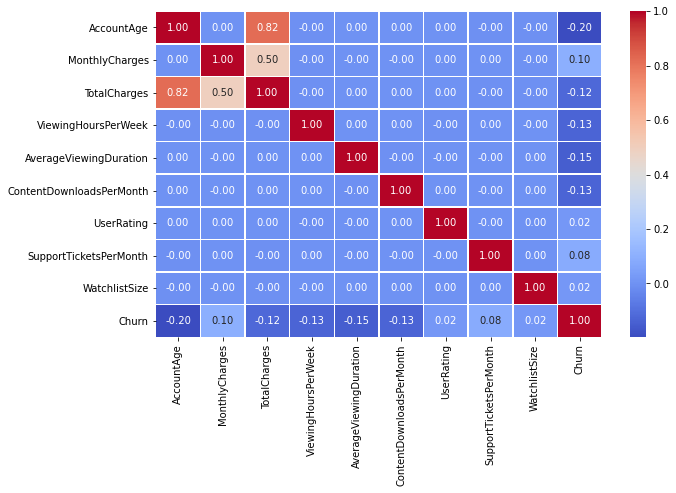

In [59]:
# Check data distrinbution
corr_mat = train_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.show()

In [60]:
threshold = 0.7
high_corr_pairs = set()

# Iterate over correlation matrix
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > threshold:
            colname = corr_mat.columns[i]
            high_corr_pairs.add(colname)

# Drop highly correlated features
#df_reduced = train_df.drop(columns=high_corr_pairs)
print(f"Remove features due to high correlation: {high_corr_pairs}")

Remove features due to high correlation: {'TotalCharges'}


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_df.drop(columns=["Churn", "SubscriptionType", "PaymentMethod", "PaperlessBilling","ContentType","MultiDeviceAccess", "DeviceRegistered", "GenrePreference","Gender", "CustomerID", "ParentalControl", "SubtitlesEnabled"])  # Remove target variable
y = train_df["Churn"]  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importances)

                    Feature  Importance
4    AverageViewingDuration    0.146334
3       ViewingHoursPerWeek    0.140826
1            MonthlyCharges    0.129945
2              TotalCharges    0.123029
6                UserRating    0.120003
0                AccountAge    0.106368
5  ContentDownloadsPerMonth    0.096843
8             WatchlistSize    0.080811
7    SupportTicketsPerMonth    0.055840


In [62]:
# scaler = MinMaxScaler() #StandardScaler()  
# num_cols = ["AccountAge", "MonthlyCharges", "TotalCharges", "ViewingHoursPerWeek", "AverageViewingDuration", "ContentDownloadsPerMonth",\
#             "UserRating", "SupportTicketsPerMonth", "WatchlistSize"]

# train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
# train_df.head(5)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,0.161017,0.404346,0.091044,Premium,Mailed check,No,Both,No,Mobile,0.916881,...,0.204082,Sci-Fi,0.294124,0.444444,Male,0.125000,No,No,CB6SXPNVZA,0
1,0.474576,0.012343,0.122169,Basic,Credit card,Yes,Movies,No,Tablet,0.806430,...,0.367347,Action,0.619659,0.888889,Male,0.958333,No,Yes,S7R2G87O09,0
2,0.610169,0.474443,0.370216,Basic,Mailed check,Yes,Movies,No,Computer,0.163978,...,0.469388,Fantasy,0.809708,0.666667,Male,0.041667,Yes,Yes,EASDC20BDT,0
3,0.262712,0.151580,0.095819,Basic,Electronic check,No,TV Shows,No,Tablet,0.691296,...,0.612245,Drama,0.819005,0.222222,Male,1.000000,Yes,Yes,NPF69NT69N,0
4,0.474576,0.797540,0.404988,Premium,Electronic check,Yes,TV Shows,No,TV,0.489320,...,0.408163,Comedy,0.654044,0.444444,Female,0.000000,No,No,4LGYPK7VOL,0


In [63]:
# Class imbalance
# Feature correlation - heatmap
# How is the data distribution for each column - pairplot

In [ ]:
X = train_df.drop(columns=["Churn", "CustomerID"])
y = train_df["Churn"]

test_customer_id=test_df["CustomerID"]
X_test = test_df.drop(columns=["CustomerID"])

num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
print('num_cols: ', num_cols)
print('\n cat_cols: ', cat_cols)

In [ ]:
binary_cols=["PaperlessBilling","MultiDeviceAccess","ParentalControl","SubtitlesEnabled"]
multi_cat_cols=list(set(cat_cols)-set(binary_cols))

print('binary_cols: ',binary_cols)
print('multi_cat_cols: ',multi_cat_cols)

# preprocessor = ColumnTransformer(transformers=[
#     ("num", "passthrough", num_cols),
#     ("bin", OneHotEncoder(), binary_cols),
#     ("cat", OneHotEncoder(handle_unknown='ignore'), multi_cat_cols)
# ])

In [12]:
# # For numerical columns
# num_imputer = SimpleImputer(strategy='mean')
# X[num_cols] = num_imputer.fit_transform(X[num_cols])
# X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# # For categorical columns
# cat_imputer = SimpleImputer(strategy='most_frequent')
# X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
# X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [25]:
print(X.head(3))

   AccountAge  MonthlyCharges  TotalCharges SubscriptionType PaymentMethod  \
0          20       11.055215    221.104302          Premium  Mailed check   
1          57        5.175208    294.986882            Basic   Credit card   
2          73       12.106657    883.785952            Basic  Mailed check   

  PaperlessBilling ContentType MultiDeviceAccess DeviceRegistered  \
0               No        Both                No           Mobile   
1              Yes      Movies                No           Tablet   
2              Yes      Movies                No         Computer   

   ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  \
0            36.758104               63.531377                        10   
1            32.450568               25.725595                        18   
2             7.395160               57.364061                        23   

  GenrePreference  UserRating  SupportTicketsPerMonth Gender  WatchlistSize  \
0          Sci-Fi    2.176

In [35]:
print(X[binary_cols])

       PaperlessBilling MultiDeviceAccess ParentalControl SubtitlesEnabled
0                    No                No              No               No
1                   Yes                No              No              Yes
2                   Yes                No             Yes              Yes
3                    No                No             Yes              Yes
4                   Yes                No              No               No
...                 ...               ...             ...              ...
243782               No                No             Yes               No
243783               No               Yes              No               No
243784              Yes                No             Yes              Yes
243785              Yes                No              No              Yes
243786               No                No             Yes               No

[243787 rows x 4 columns]


In [13]:
# # label encoding for binary features
# print(binary_cols)
# binary_map = {'Yes':1, 'No':0}
# for cols in binary_cols:
#     X[cols] = X[cols].map(binary_map)
#     X_test[cols] = X_test[cols].map(binary_map)

# print(X.head(10))
# print(X_test.head(10))

['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']
   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   
5         113        7.295744    824.419081          Premium   
6          38       12.340675    468.945639          Premium   
7          25        7.247550    181.188753         Standard   
8          26       19.803233    514.884050         Standard   
9          14       18.842934    263.801080         Standard   

      PaymentMethod  PaperlessBilling ContentType  MultiDeviceAccess  \
0      Mailed check                 0        Both                  0   
1       Credit card                 1      Movies                  0  

In [37]:
# #OHE multi category encoding - Approach 1

# encoder = OneHotEncoder(sparse=False, drop=None, handle_unknown='error')
# X_cat_encoded = encoder.fit_transform(X[multi_cat_cols])
# X_test_cat_encoded = encoder.transform(X_test[multi_cat_cols])
# encoded_cols = encoder.get_feature_names(multi_cat_cols)

# # Convert to DataFrames
# encoded_train_df = pd.DataFrame(X_cat_encoded, columns=encoded_cols, index=X.index)
# encoded_test_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_cols, index=X_test.index)

# # Drop original multi-cat columns and add encoded ones
# X_enc = X.drop(columns=multi_cat_cols).join(encoded_train_df)
# X_test_enc = X_test.drop(columns=multi_cat_cols).join(encoded_test_df)

# print(X_enc.shape)
# print(X_test_enc.head(5))
# print(X.info())


#Label Encoding - Approach 2
# X_enc=X
# X_test_enc=X_test
# for col in multi_cat_cols:
#     X_enc[col] = X[col].astype("category").cat.codes
#     X_test_enc[col] = X_test[col].astype("category").cat.codes

In [ ]:
def prepare_data_for_model(X, X_test, model_type="tree"):
    if model_type == "tree":
        binary_map = {'Yes':1, 'No':0}
        for cols in binary_cols:
            X[cols] = X[cols].map(binary_map)
            X_test[cols] = X_test[cols].map(binary_map)
    
        for col in multi_cat_cols:
            X[col] = X[col].astype("category").cat.codes
            X_test[col] = X_test[col].astype("category").cat.codes
        return X, X_test
            
    elif model_type=="log_r":
        X = pd.get_dummies(X, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        print(X.head(5))
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X_test = scaler.fit_transform(X_test)
        print(X.head(5))
        return X, X_test
  
# X_enc=X
# X_test_enc=X_test
X_enc, X_test_enc = prepare_data_for_model(X, X_test, "tree")
print(X_enc.head(10))
print(X_test_enc.head(10))

In [ ]:
print(X_enc.head(10))

In [19]:
#Try other models

from sklearn.model_selection import cross_val_score

for model in [XGBClassifier(), RandomForestClassifier(), LGBMClassifier(), LogisticRegression(max_iter=1000)]:
    score = cross_val_score(model, X_enc, y, scoring='roc_auc', cv=5).mean()
    print(f"{model.__class__.__name__}: ROC AUC = {score:.4f}")


XGBClassifier: ROC AUC = 0.7387
RandomForestClassifier: ROC AUC = 0.7289
LGBMClassifier: ROC AUC = nan
LogisticRegression: ROC AUC = 0.7476


In [ ]:
#Try XGBClassifier with Gridsearch or try RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os
# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Safer usage
n_cores = os.cpu_count()
safe_n_jobs = max(1, n_cores - 2)  # Leaves one core for system

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Setup GridSearch
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,             # 3-fold cross-validation
    verbose=3,
    n_jobs=safe_n_jobs         # Use all CPU cores
)

# Fit grid search to your training data
grid.fit(X_enc, y)

# Output best results
print("Best AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)

In [ ]:
best_model = grid.best_estimator_  # The tuned model
print(best_model)
predicted_probs = best_model.predict_proba(X_test_enc)[:, 1]

In [38]:
import os
print("Number of CPU cores:", os.cpu_count())

import multiprocessing
print("Number of CPU cores:", multiprocessing.cpu_count())

Number of CPU cores: 32
Number of CPU cores: 32


In [ ]:
# Another approach : Ensemble


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [25]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:

for col in cat_cols:
    X_enc[col] = X_enc[col].astype("category").cat.codes

model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_enc, y)
predicted_probs = model.predict_proba(X_test_enc)[:, 1]
# pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("classifier", model)
# ])
#pipeline.fit(X,y)


# dummy_clf = DummyClassifier(strategy="stratified")
# dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

In [ ]:
# Try Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_enc, y)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

In [ ]:
# Try Ensemble 
# Weighted average of predictions
# Tune weights as needed (e.g., 60% XGBoost, 40% Logistic Regression)
predicted_probs = 0.6 * predicted_probs + 0.4 * lr_probs

In [53]:
# scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
# print(f"Average ROC AUC: {scores.mean():.4f}")

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
# predicted_probability = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probs})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [28]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [29]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [30]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [31]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [32]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!